In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


In [4]:
data_file = "../data/HousingData.csv"
houseDF = pd.read_csv(data_file)
houseDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
houseDF_dropna = houseDF.dropna()
houseDF_dropna.info()


<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [6]:
featureDF = houseDF_dropna.drop(["MEDV"], axis=1)
targetSR = houseDF_dropna["MEDV"]


In [7]:
tree_model = DecisionTreeRegressor().fit(featureDF, targetSR)


In [9]:
importance = tree_model.feature_importances_
importance


array([0.03495869, 0.00221788, 0.01081251, 0.00063148, 0.01594512,
       0.60139836, 0.01267336, 0.04904668, 0.00880375, 0.01120806,
       0.02824355, 0.00371926, 0.2203413 ])

In [12]:
importanceDF = pd.DataFrame(importance, index=featureDF.columns, columns=["Importance"])
importanceDF.sort_values("Importance", ascending=False)


,Importance
RM,0.601398
LSTAT,0.220341
DIS,0.049047
CRIM,0.034959
PTRATIO,0.028244
NOX,0.015945
AGE,0.012673
TAX,0.011208
INDUS,0.010813
RAD,0.008804


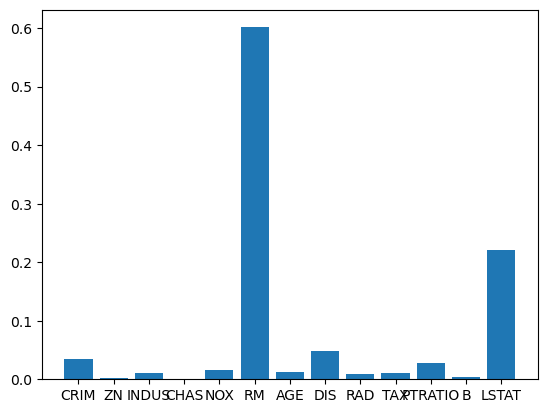

In [15]:
plt.bar(importanceDF.index, importanceDF["Importance"])
plt.show()
